In [92]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

epoch = 4
lr = 0.01
batch_size_train = 64
batch_size_test = 1000

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/Downloads', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/Downloads', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor()])),
  batch_size=batch_size_test, shuffle=True)

In [42]:
def show_tensor_images(image_tensor, num_images=8, size=(1, 28, 28)):    
    image_unflat = image_tensor.detach().cpu().view(-1, *size)    
    image_grid = make_grid(image_unflat[:num_images], nrow=8)    
    plt.imshow(image_grid.permute(1, 2, 0).squeeze())    
    plt.show()

In [88]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 3, 3)
        self.conv2 = nn.Conv2d(3, 5, 2)
        self.pooling = nn.MaxPool2d(2, 1)
        self.fc1 = nn.Linear(24 * 24 * 5, 784 * 2)
        self.fc2 = nn.Linear(784 * 2, 1000)
        self.fc3 = nn.Linear(1000, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pooling(x)
        x = F.leaky_relu(x)
        x = x.view(-1, 24 * 24 * 5)
        x = self.fc1(x)
        torch.nn.Dropout()
        x = F.leaky_relu(x)
        x = self.fc2(x)
        torch.nn.Dropout()
        x = F.leaky_relu(x)
        torch.nn.Dropout()
        x = self.fc3(x)
        torch.nn.Dropout()
        return F.log_softmax(x)

def train(epoch, net):
    count = 0
    for i in range(epoch):
        optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
        loss = nn.CrossEntropyLoss()
        for i, (image, target) in enumerate(train_loader):
            prediction = net.forward(image).cuda()
            optimizer.zero_grad()
            l = loss(prediction, target.cuda())
            l.backward()
            optimizer.step()
            count += 1
            plt.plot(count, l.item(), 'ro')
            
def to_number(tensor):
    t = tensor.tolist()
    for i in range(len(t)):
        t[i] = t[i].index(max(t[i]))
    return t

def count_correctness(prediction, ground_truth):
    eq = len([prediction[i] for i in range(len(prediction)) if prediction[i] == ground_truth[i]])
    return eq / len(prediction) * 100

def test(net):
    optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)
    loss = nn.CrossEntropyLoss()
    for i, (image, target) in enumerate(test_loader):
        if i < 8:
            prediction = net.forward(image)
            show_tensor_images(image)
            print("Prediction: " + str(to_number(prediction[:8])).rstrip("]") + "...")
            print("Ground Truth: " + str(target.tolist()[:8]).rstrip("]") + "...")
            print("Percentage Correct: " + str(count_correctness(to_number(prediction), target.tolist())))
        l = loss(prediction, target)


<ipython-input-88-4b4ae59f802b>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


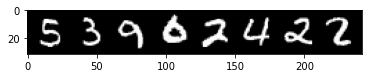

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [5, 3, 9, 6, 2, 4, 2, 2...
Percentage Correct: 8.4


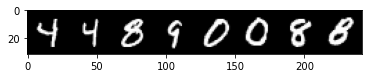

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [4, 4, 8, 9, 0, 0, 8, 8...
Percentage Correct: 9.700000000000001


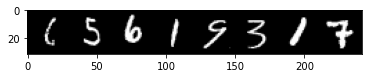

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [6, 5, 6, 1, 9, 3, 1, 7...
Percentage Correct: 9.0


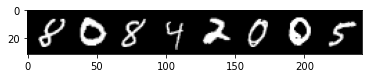

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [8, 0, 8, 4, 2, 0, 0, 5...
Percentage Correct: 11.799999999999999


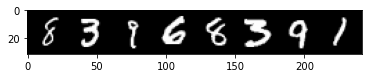

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [8, 3, 9, 6, 8, 3, 9, 1...
Percentage Correct: 10.2


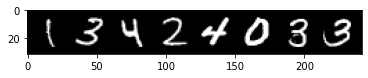

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [1, 3, 4, 2, 4, 0, 3, 3...
Percentage Correct: 9.3


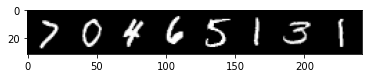

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [7, 0, 4, 6, 5, 1, 3, 1...
Percentage Correct: 9.6


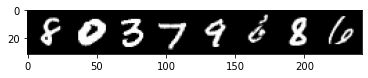

Prediction: [8, 8, 8, 8, 8, 8, 8, 8...
Ground Truth: [8, 0, 3, 7, 9, 6, 8, 6...
Percentage Correct: 10.299999999999999


In [89]:
net = Net()
test(net)

<ipython-input-88-4b4ae59f802b>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


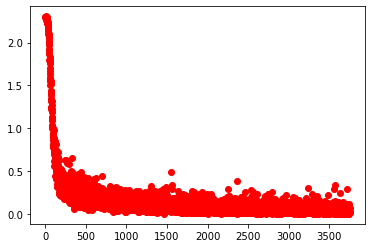

In [90]:
train(4, net)

<ipython-input-88-4b4ae59f802b>:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


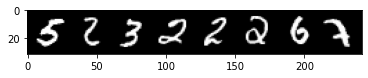

Prediction: [5, 2, 3, 2, 2, 2, 6, 3...
Ground Truth: [5, 2, 3, 2, 2, 2, 6, 7...
Percentage Correct: 98.7


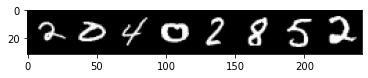

Prediction: [2, 0, 4, 0, 2, 8, 5, 2...
Ground Truth: [2, 0, 4, 0, 2, 8, 5, 2...
Percentage Correct: 98.4


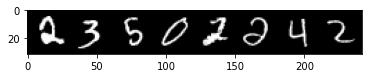

Prediction: [2, 3, 5, 0, 2, 2, 4, 2...
Ground Truth: [2, 3, 5, 0, 2, 2, 4, 2...
Percentage Correct: 97.8


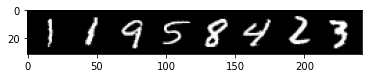

Prediction: [1, 1, 9, 5, 8, 4, 2, 3...
Ground Truth: [1, 1, 9, 5, 8, 4, 2, 3...
Percentage Correct: 98.5


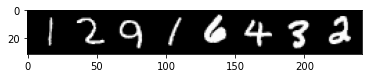

Prediction: [1, 2, 9, 1, 6, 4, 3, 2...
Ground Truth: [1, 2, 9, 1, 6, 4, 3, 2...
Percentage Correct: 97.1


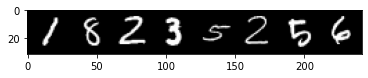

Prediction: [1, 8, 2, 3, 5, 2, 5, 6...
Ground Truth: [1, 8, 2, 3, 5, 2, 5, 6...
Percentage Correct: 98.4


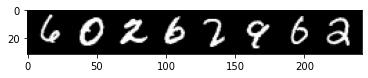

Prediction: [6, 0, 2, 6, 2, 9, 6, 2...
Ground Truth: [6, 0, 2, 6, 2, 9, 6, 2...
Percentage Correct: 98.4


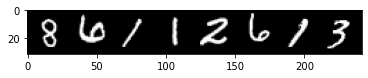

Prediction: [8, 6, 1, 1, 2, 6, 1, 3...
Ground Truth: [8, 6, 1, 1, 2, 6, 1, 3...
Percentage Correct: 97.8


In [91]:
test(net)